# Job Opportunity Analysis

### This notebook is a analysis of job opportuniteis in france. It contains all sample code and solutions.

### You can download the dataset from the below link

https://www.kaggle.com/datasets/bryanb/applicants-for-a-gold-digger-position

## Setup

#### First lets make sure that we have installed the required libraries and works well both in python 2 and python 3.

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Now lets see our dataset

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


## Data cleaning process

### To check for NAN values

In [3]:
nan_df = data[data.isna().any(axis=1)]
nan_df.head()

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
26,26,2013-04-12,brun,33.0,8.0,NaN,F,licence,detective,56.99,non,0
59,59,2010-04-05,chatain,NaN,9.0,40992.0,F,master,archeologie,79.33,oui,0
63,63,2011-09-03,blond,31.0,16.0,35113.0,M,master,geologie,101.14,NaN,1
85,85,2014-06-26,blond,21.0,14.0,33632.0,M,licence,geologie,NaN,non,0


### Delete NAN values

In [4]:
all_data = data.dropna()
all_data

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


### Delete ages that are less than 18

#### Because age with -3 and -2 are showing in our dataset which could cause error to our dataset. So to process with we have to ages that are less than 18

In [5]:
age_delete = all_data[~(all_data['age'] <= 18)]  

In [6]:
age_delete

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


### Summary of Statistics data

In [7]:
all_data.describe()

,Unnamed: 0,age,exp,salaire,note,embauche
count,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000
mean,9993.008990,34.998791,9.496662,34966.878713,75.184446,0.114558
std,5771.344205,9.606263,3.012915,5005.208499,17.112102,0.318496
min,0.000000,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,4986.000000,29.000000,7.000000,31593.000000,63.730000,0.000000
50%,9989.000000,35.000000,9.000000,34968.000000,75.110000,0.000000
75%,14993.000000,41.000000,12.000000,38353.000000,86.670000,0.000000
max,19999.000000,72.000000,23.000000,53977.000000,143.220000,1.000000


### Rename columns i.e from french to english

In [12]:
age_delete.rename(columns = {'embauche':'hiring', 'salaire':'salary','dispo':'available','cheveux':'hair'}, inplace = True)
age_delete.head()

C:\Users\Ashwath\AppData\Local\Temp\ipykernel_9840\660936777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_delete.rename(columns = {'embauche':'hiring', 'salaire':'salary','dispo':'available','cheveux':'hair'}, inplace = True)


,Unnamed: 0,date,hair,age,exp,salary,sexe,diplome,specialite,note,available,hiring
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1


#### Acually the dataset we have downloaded is in french language so we have to translate it to english to proceed further.

### Question 1 : What experience  earns more salary?

In [13]:
results = age_delete.groupby('exp').sum()
results

,Unnamed: 0,age,salary,note,hiring
exp,,,,,
-2.0,11284,34.0,51294.0,38.40,0
-1.0,6025,36.0,29241.0,85.34,0
0.0,180807,801.0,751019.0,1762.21,1
1.0,475128,1496.0,1446040.0,3192.31,3
2.0,1005813,3504.0,3460664.0,7468.99,9
3.0,2506969,9270.0,8919862.0,19350.49,22
4.0,4367967,15599.0,15110323.0,32896.41,48
5.0,7677058,28244.0,27324183.0,59077.93,77
6.0,12294852,45339.0,43685600.0,93166.18,150


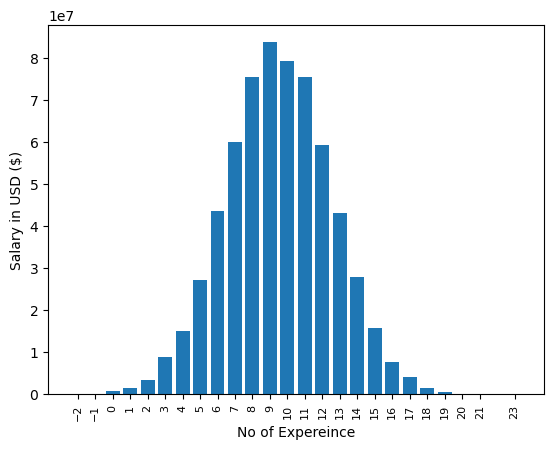

In [14]:


expereicne = [expe for expe, df in age_delete.groupby('exp')]


plt.bar(expereicne,results['salary'])
plt.xticks(expereicne,rotation='vertical',size=8)
plt.ylabel('Salary in USD ($)')
plt.xlabel('No of Expereince')
plt.show()

#### From the above plot  we can understand that expereince with 9 years have more salary compared to others

### Question 2 : Which age group earns more salary?

In [15]:
age_results = age_delete.groupby('age').sum()
age_results.head()

,Unnamed: 0,exp,salary,note,hiring
age,,,,,
19.0,1756763,1844.0,6775810.0,14466.54,20
20.0,2454581,2275.0,8397345.0,17859.65,32
21.0,2571124,2492.0,9207980.0,20016.77,39
22.0,2918186,2721.0,10043025.0,21073.43,26
23.0,3687447,3519.0,12888180.0,28602.69,30


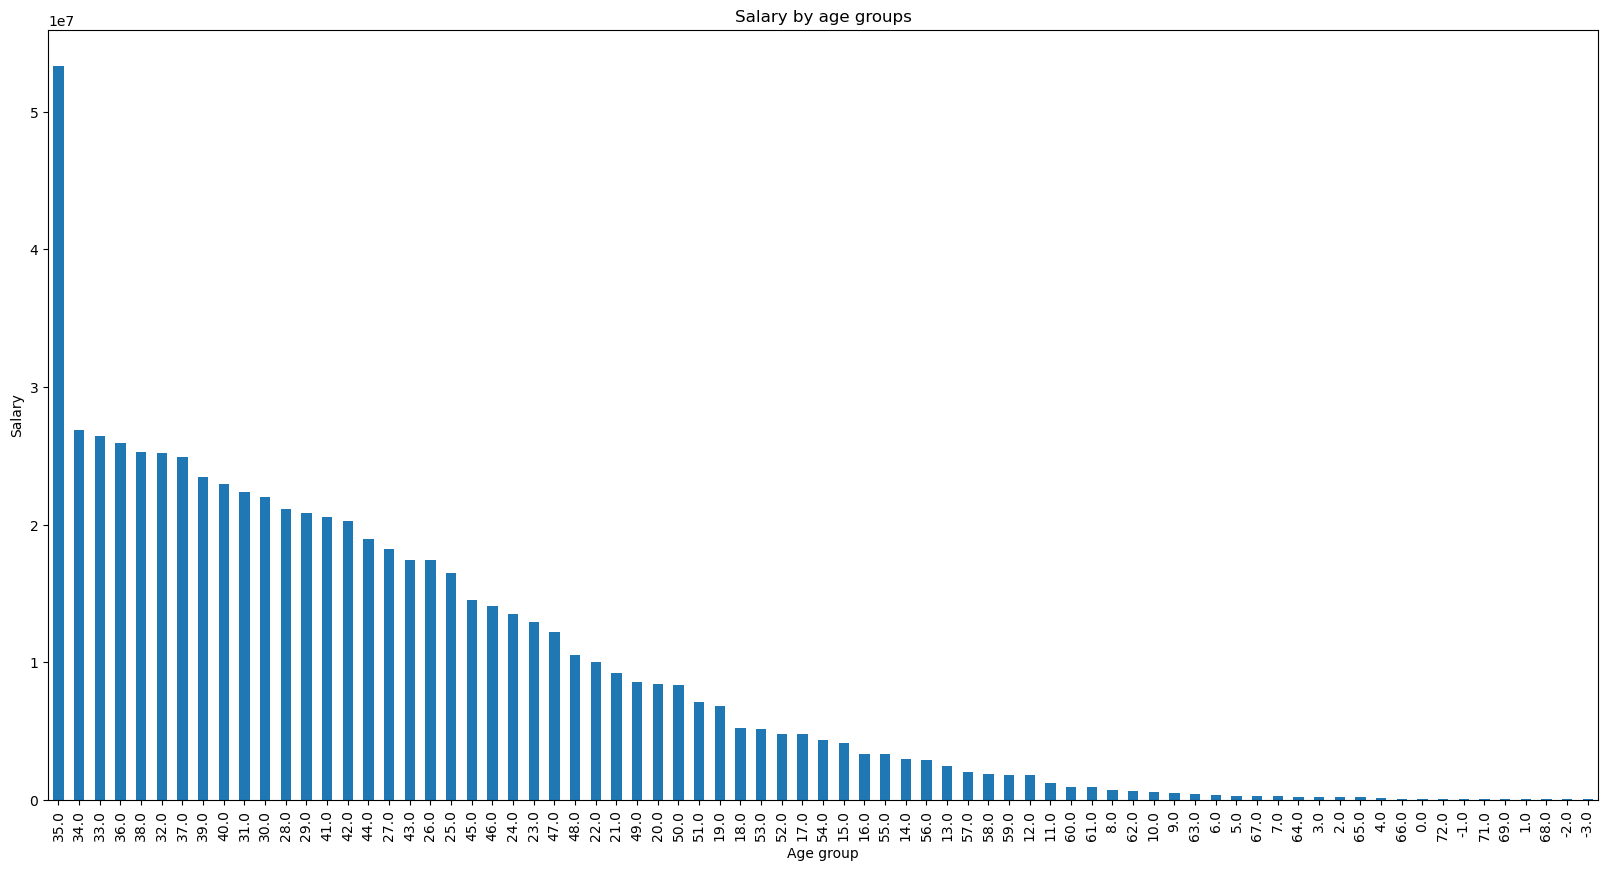

In [25]:
plt.figure(figsize=(20,10))
age_calc = age_delete.groupby(['age'])['salary'].sum().sort_values(ascending=False)
age_calc.plot(kind = 'bar')
plt.title('Salary by age groups')
plt.xlabel('Age group')
plt.ylabel('Salary')
plt.show()

#### From this we can understand that age group of 30 years has more salary compared to other age groups

### Question 3 : Which diploma has highest hiring capability?

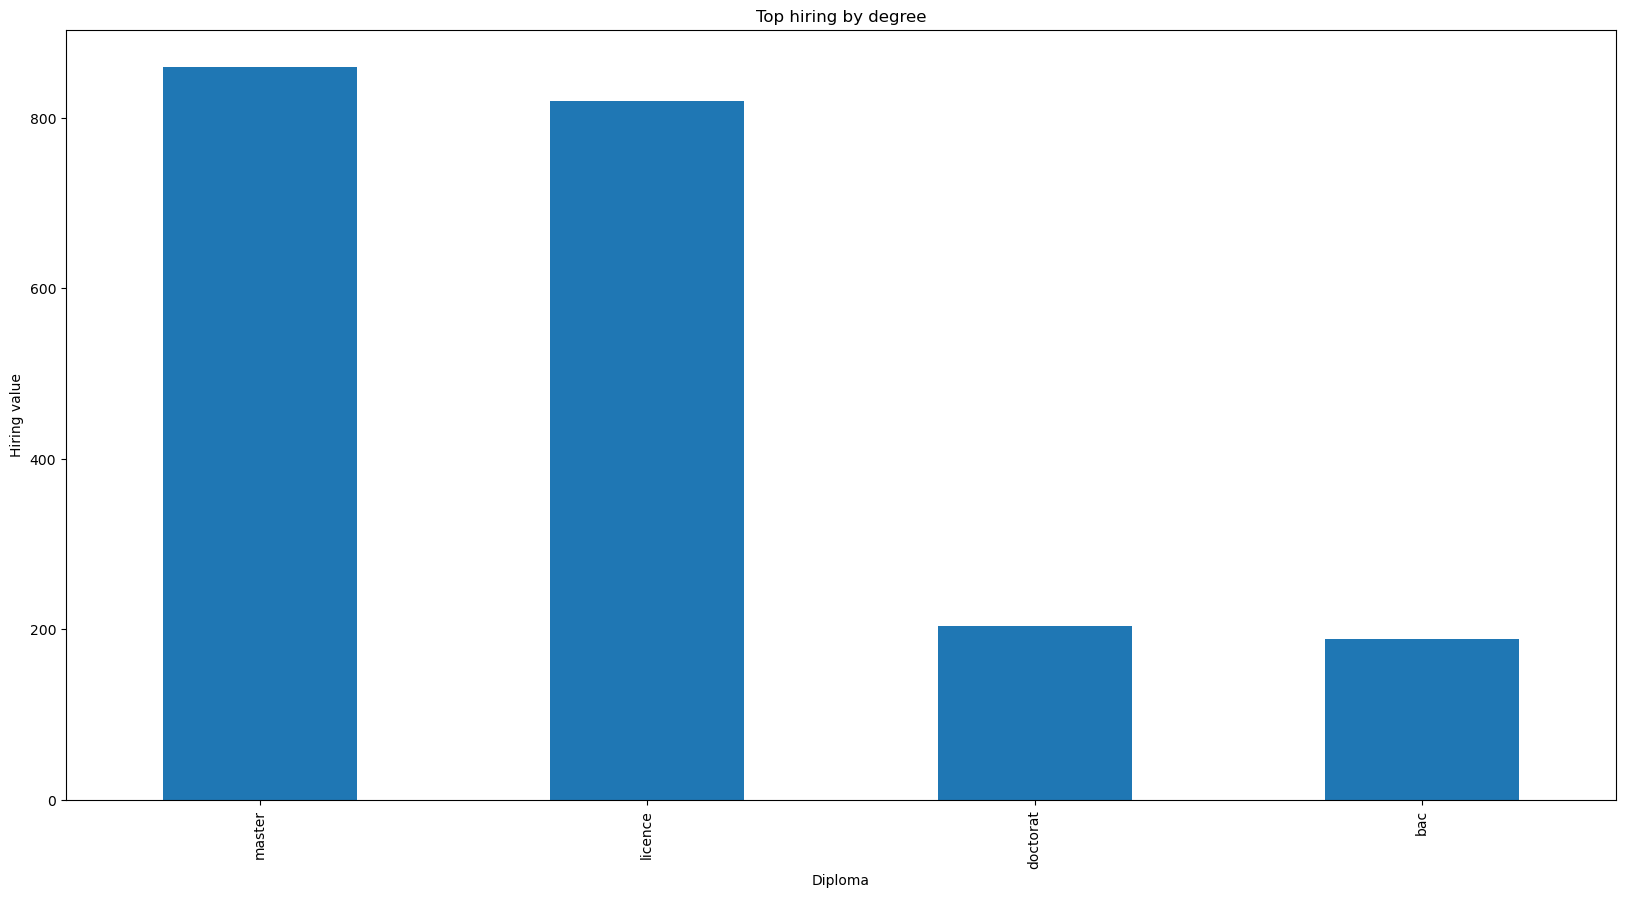

In [17]:
plt.figure(figsize=(20,10))
age_calc = age_delete.groupby(['diplome'])['hiring'].sum().sort_values(ascending=False)
age_calc.plot(kind = 'bar')
plt.title('Top hiring by degree')
plt.xlabel('Diploma')
plt.ylabel('Hiring value')
plt.show()

#### From the above graph we can understand that master degree holders has highest hiring capacities than other degree holders

### Question 4 : Which specilaztion has highest job opportunities?

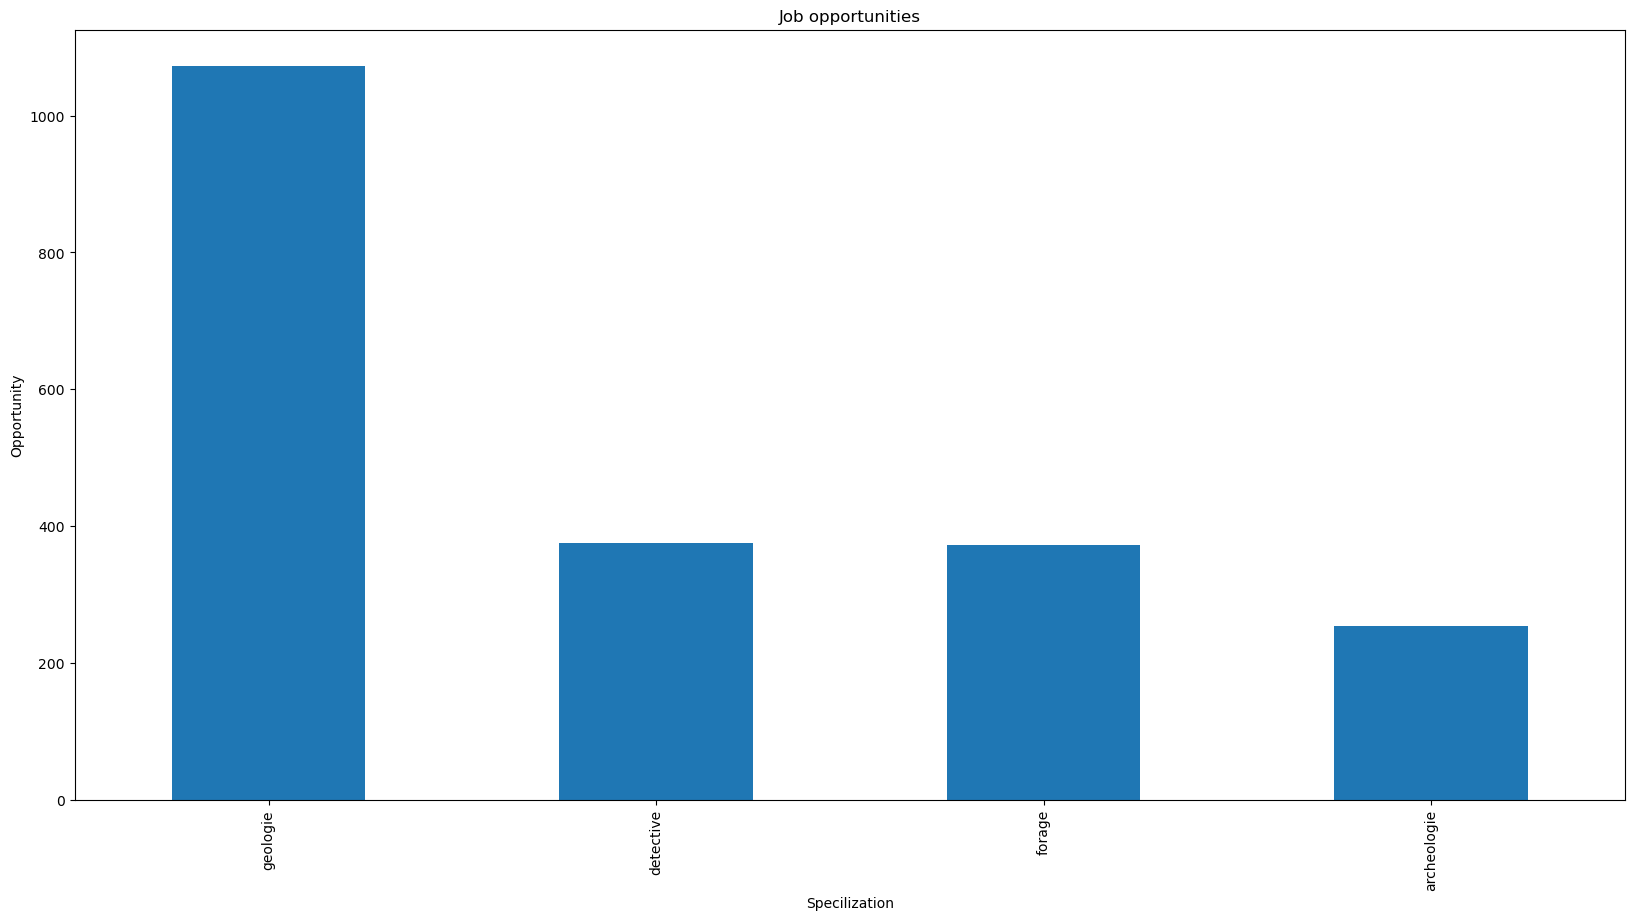

In [18]:
plt.figure(figsize=(20,10))
age_calc = age_delete.groupby(['specialite'])['hiring'].sum().sort_values(ascending=False)
age_calc.plot(kind = 'bar')
plt.title('Job opportunities')
plt.xlabel('Specilization')
plt.ylabel('Opportunity')
plt.show()

#### From this we can understand that gelogist have highest job opportunity in France

### Question 5 : Why do you think Geologist have higher opportunity than other specilizations?

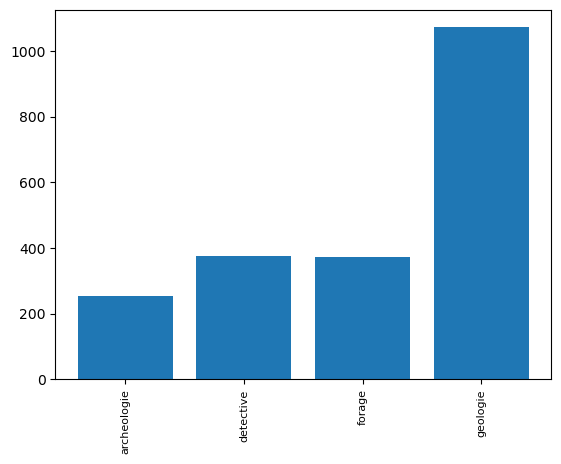

In [29]:
spec = age_delete.groupby('specialite')
hiring = spec.sum()['hiring']
job_opp = [job for job, df in spec]
plt.bar(job_opp,hiring)
plt.xticks(job_opp, rotation='vertical', size=8)

plt.show()

C:\Users\Ashwath\AppData\Local\Temp\ipykernel_9840\2417518593.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(job_opp, rotation='vertical', size=8)
C:\Users\Ashwath\AppData\Local\Temp\ipykernel_9840\2417518593.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


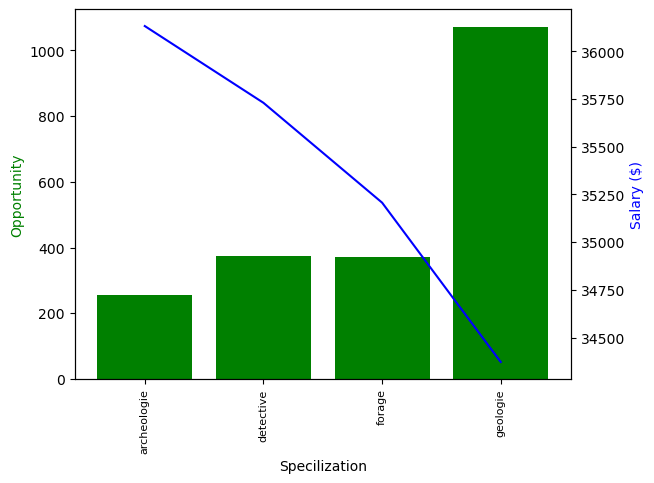

In [30]:
opp = age_delete.groupby('specialite').mean()['salary']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(job_opp, hiring, color='g')
ax2.plot(job_opp, opp, color='b')

ax1.set_xlabel('Specilization')
ax1.set_ylabel('Opportunity', color='g')
ax2.set_ylabel('Salary ($)', color='b')
ax1.set_xticklabels(job_opp, rotation='vertical', size=8)

fig.show()

#### In this we are making some trends to understand why gelogist have highest salary compared to others and from this ####understand why gelogist have higher opportunities compared to other specilization holders.



### Question 6 : Which gender has more job openings?

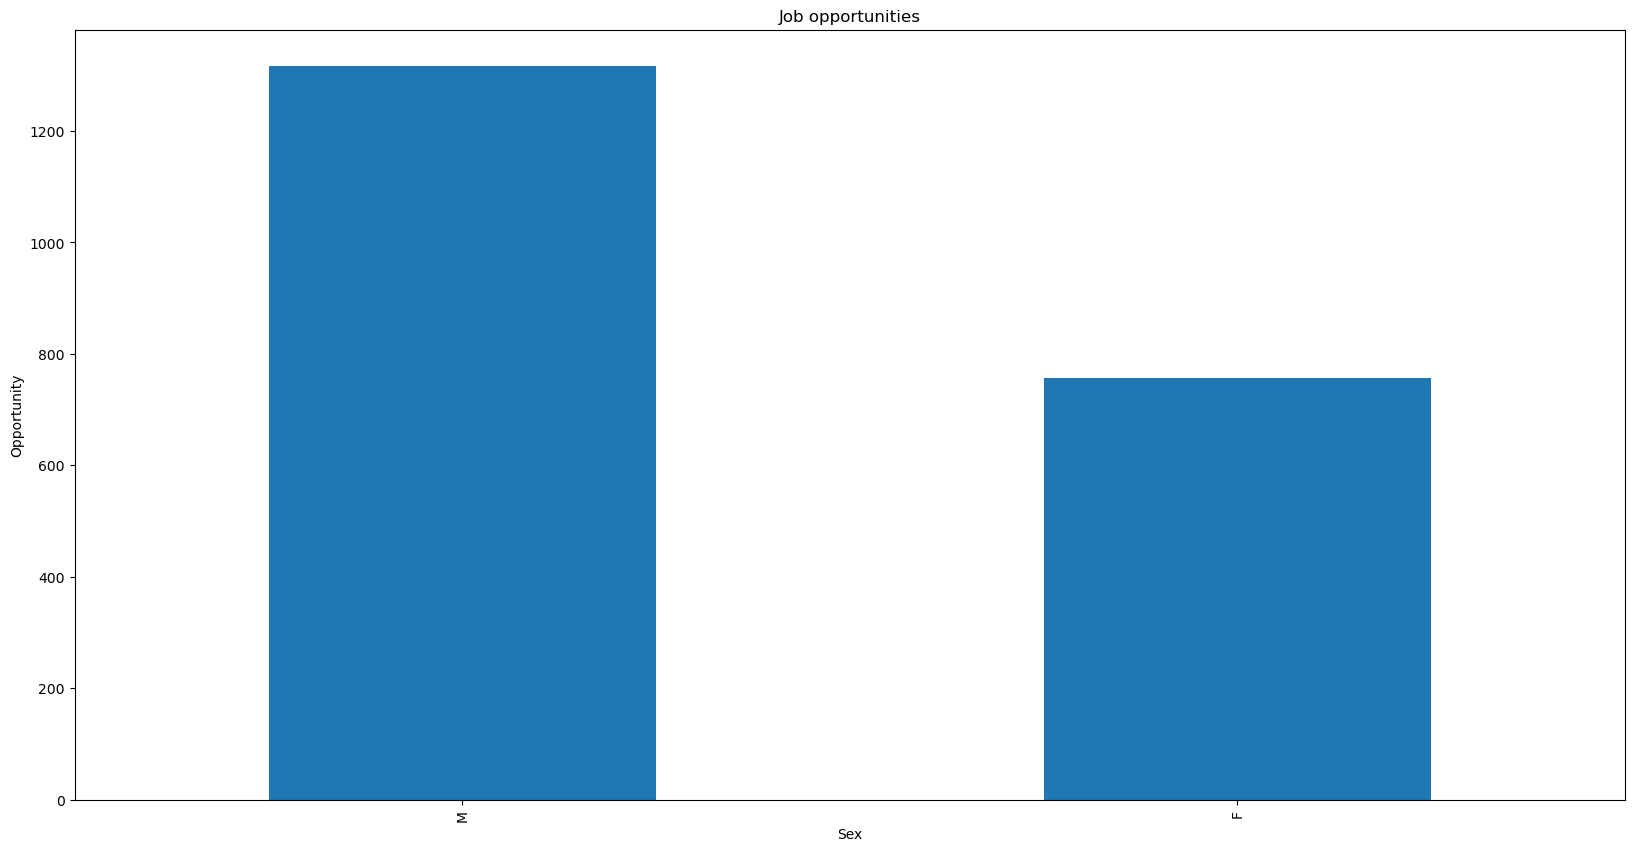

In [31]:
plt.figure(figsize=(20,10))
gender = age_delete.groupby(['sexe'])['hiring'].sum().sort_values(ascending=False)
gender.plot(kind = 'bar')
plt.title('Job opportunities')
plt.xlabel('Sex')
plt.ylabel('Opportunity')
plt.show()

#### From the above plot we can understand that Male has more job opportunities that female

#### This is the summary of the dataset

#### In this dataset we have seen how to analze,clean,process and visualize and make trends using python. I hope you enjoyed my code and you dowload this code anytime